In [9]:
### ---------------------------------------------------------------------------------------------------------------- ###
### AONN - Curve Fitting                                                                                             ###
### Author: Anderson Xu                                                                                              ###
### ---------------------------------------------------------------------------------------------------------------- ###

# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

In [10]:
### ---------------------------------------------------------------------------------------------------------------- ###
### User Input Section                                                                                               ###
### ---------------------------------------------------------------------------------------------------------------- ###
# please provide the path the main results folder after you run the EIT Analysis tool
results_file_path = r'C:\Users\zxq220007\Box\Quantum Optics Lab\TeTON OANN Testbed\Data 2024\Apr 16 2024\5X5 Trans5 50mm cell 130C 290MHz 3037MHz\Results 2'

# define the type of curve fitting function
# choose from the list below to indicate the type of curve fitting function
# 1. concave up exponential
# 2. concave down exponential
# 3. logarithmic
# 4. EIA + EIT curve 
function_type = 1
### ---------------------------------------------------------------------------------------------------------------- ###

In [11]:
### ---------------------------------------------------------------------------------------------------------------- ###
### Function Definitions                                                                                             ###
### ---------------------------------------------------------------------------------------------------------------- ###
# Read the csv file and return the data as numpy arrays, ignore the first row, store the first column as x and the second column as y
def read_csv_file(file_path):
    data = np.genfromtxt(file_path, delimiter=',', skip_header=1)
    x = data[:, 0]
    y = data[:, 1]
    return x, y

def concave_up_exponential(x, a, b, c):
    return a*np.exp(b*x) + c

    
def concave_down_exponential(x, a, b, c):
    return a*np.exp(-3*b*12 / (b*12 + 12800*x))

def logarithmic(x, a, b):
    return a*np.log(b*x)

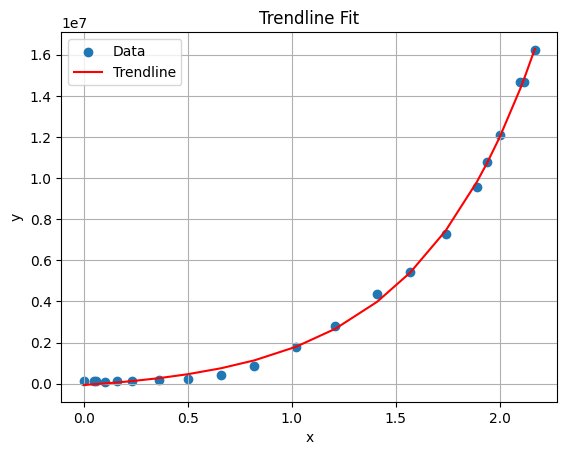

In [12]:
### ---------------------------------------------------------------------------------------------------------------- ###
### Main Code                                                                                                        ###
### ---------------------------------------------------------------------------------------------------------------- ###
# File path handling
# Inside the results file path, there are 20 folders, each containing a csv file
folder_names = [f'Beam{i}' for i in range(1, 26)]
csv_file_name = [f'EIT_Intensity_Beam{i}.csv' for i in range(1, 26)]
# Using the results file path and the names defined above, we can define the full path to the csv files in a loop
full_csv_file_paths = [os.path.join(results_file_path, folder_name, csv_file_name) for folder_name, csv_file_name in zip(folder_names, csv_file_name)]

# Read the csv files and store the data in a dictionary
data = {}
for i, full_csv_file_path in enumerate(full_csv_file_paths):
    x, y = read_csv_file(full_csv_file_path)
    data[f'Beam{i+1}'] = (x, y)

# Define the curve fitting function based on the user input using a switch
if function_type == 1:
    popt, _ = curve_fit(concave_up_exponential, x, y)
    # Extract the optimized values of a and b
    a_opt, b_opt, c_opt = popt
    trendline_y = concave_up_exponential(x, a_opt, b_opt, c_opt)
elif function_type == 2:
    popt, _ = curve_fit(concave_down_exponential, x, y)
    # Extract the optimized values of a and b
    a_opt, b_opt, c = popt
    trendline_y = concave_down_exponential(x, a_opt, b_opt, c)
elif function_type == 3:
    popt, _ = curve_fit(logarithmic, x, y)
    # Extract the optimized values of a and b
    a_opt, b_opt = popt
    trendline_y = logarithmic(x, a_opt, b_opt)
else:
    raise ValueError('Invalid function type')


# Plotting

# Equation for the logarithmic trendline
# equation = f'y = {a_opt:.4f}*exp(- 3* {b_opt:.4f}*12 / ({b_opt:.4f}*12 + 12800*x))'

# Plot the data and the trendline
plt.scatter(x, y, label='Data')
plt.plot(x, trendline_y, color='red', label='Trendline')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trendline Fit')
# plt.text(2, 0.2, equation, fontsize=12, color='blue')
plt.legend()
plt.grid(True)
plt.show()
